In [1]:
import qutip
from qutip import create, destroy, tensor, identity
import numpy as np
import matplotlib.pylab as plt

# Do complex Hamiltonians lead to directional dynamics?

In [2]:
w1 = 0.0
w2 = 0.0
g = 1.0
P1 = tensor(create(2) * destroy(2), identity(2))
H1 = w1 * P1
P2 = tensor(identity(2), create(2) * destroy(2))
H2 = w1 * P2
H_int_real = g * (tensor(create(2), destroy(2)) + tensor(destroy(2), create(2)))
H_real = H1 + H2 + H_int_real
H_real

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]]

In [3]:
H_int_complex = -1j * g * (tensor(create(2), destroy(2)) - tensor(destroy(2), create(2)))
H_complex = H1 + H2 + H_int_complex
H_complex

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+1.j  0.+0.j]
 [ 0.+0.j  0.-1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]

In [4]:
ket1 = qutip.Qobj([[0], [1]])
ket0 = qutip.Qobj([[1], [0]])

In [5]:
psi0 = tensor(ket0, ket1)

In [6]:
times = np.linspace(0, 10, 100)

## Time evolution of real Hamiltonian

In [7]:
result = qutip.mesolve(H_real, psi0, times, c_ops=[], e_ops=[P1, P2])

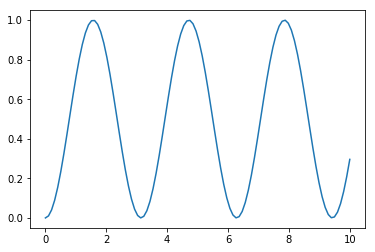

In [8]:
plt.plot(result.times, result.expect[0])
plt.show()

In [9]:
result = qutip.mesolve(H_real.dag(), psi0, times[::-1], c_ops=[], e_ops=[P1, P2])

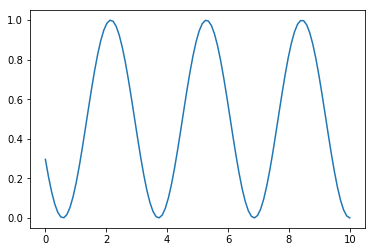

In [10]:
plt.plot(result.times, result.expect[0])
plt.show()

## Time evolution of complex Hamiltonian

In [11]:
result = qutip.mesolve(H_complex, psi0, times, c_ops=[], e_ops=[P1, P2])

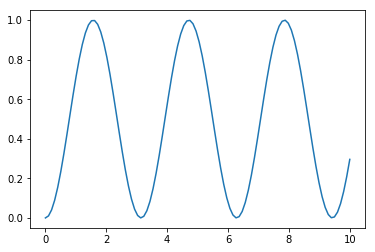

In [12]:
plt.plot(result.times, result.expect[0])
plt.show()

In [13]:
result = qutip.mesolve(H_complex.dag(), psi0, times[::-1], c_ops=[], e_ops=[P1, P2])

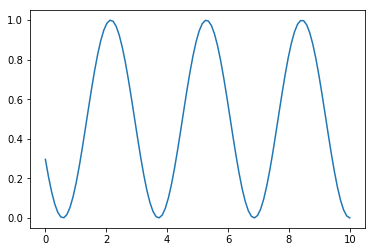

In [14]:
plt.plot(result.times, result.expect[0])
plt.show()

So where would I see the breaking of time-reversal symmetry?